In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:/Users/MURUGAVEL V/Jupyter Notebook/DeepLearning/Customer_Churn_Prediction_Using_ANN/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6365,8884-ADFVN,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.95,700.85,Yes
3472,4840-ORQXB,Female,1,No,No,56,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,104.75,5841.35,No
3443,5996-NRVXR,Male,1,Yes,No,40,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),98.15,4116.8,No
6715,1173-XZPYF,Female,0,No,No,11,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,990.3,No
2551,2882-DDZPG,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.45,227.45,No


#### First of all, drop customerID column as it is of no use

In [5]:
df.drop('customerID', axis = 'columns', inplace =True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

#### It is string. Lets convert it to numbers

In [10]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488]['TotalCharges']

' '

In [14]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

#### Remove rows with space in TotalCharges

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.dtypes

dtype('float64')

#### Data Visualization

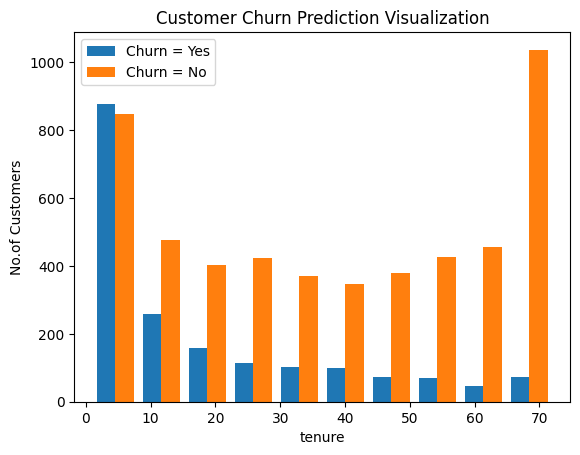

In [20]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel('No.of Customers')
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

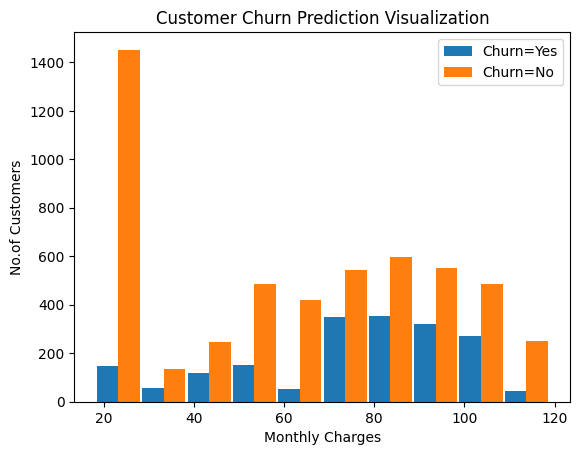

In [21]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("No.of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95,label=['Churn=Yes','Churn=No'])
plt.legend()

#### Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [23]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [24]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [26]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

In [27]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Convert Yes and No to 1 or 0

In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [30]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [31]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)

In [32]:
df1['gender'].unique()

array([1, 0], dtype=int64)

#### One hot encoding for categorical columns

In [34]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod']).astype(int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5223,0,0,1,0,61,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
6134,0,1,0,0,6,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4414,1,0,0,1,21,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6704,1,0,1,1,59,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4035,0,0,1,1,52,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [36]:
df2.dtypes

gender                                     int32
SeniorCitizen                              int32
Partner                                    int32
Dependents                                 int32
tenure                                     int32
PhoneService                               int32
MultipleLines                              int32
OnlineSecurity                             int32
OnlineBackup                               int32
DeviceProtection                           int32
TechSupport                                int32
StreamingTV                                int32
StreamingMovies                            int32
PaperlessBilling                           int32
MonthlyCharges                             int32
TotalCharges                               int32
Churn                                      int32
InternetService_DSL                        int32
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_Month-to-mo

In [37]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
783,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2807,0,0,0,1,0.084507,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
947,1,1,1,1,0.436620,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
863,1,0,0,0,0.028169,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
433,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [39]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [41]:
y_train.value_counts()

Churn
0    4164
1    1461
Name: count, dtype: int64

In [42]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [43]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [44]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [45]:
import tensorflow as tf
from tensorflow import losses
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7451 - loss: 0.5584
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.7918 - loss: 0.4345
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.7978 - loss: 0.4316
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8074 - loss: 0.4063
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8118 - loss: 0.4117
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8195 - loss: 0.3972
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8027 - loss: 0.4100
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.8017 - loss: 0.4109
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8120 - loss: 0.4085
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8037 - loss: 0.4169
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8028 - loss: 0.3997
Epoch 12/100
176/17

## Mitigating Skewdness of Data

### Method 1: Undersampling

In [50]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [51]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [52]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [53]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

#### Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.6048 - loss: 0.6610
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.7681 - loss: 0.5199
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7761 - loss: 0.4896
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.7585 - loss: 0.4891
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.7643 - loss: 0.4930
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7625 - loss: 0.4974
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.7586 - loss: 0.4939
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7749 - loss: 0.4703
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.7749 - loss: 0.4680
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.7647 - loss: 0.4832
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.7690 - loss: 0.4861
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0

### Method2: Oversampling

In [57]:
count_class_0, count_class_1

(5163, 1869)

In [58]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape
print('Random over-samping')
print(df_test_over.Churn.value_counts())

Random over-samping
Churn
0    5163
1    5163
Name: count, dtype: int64


In [59]:
X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
y_test.value_counts()

Churn
0    1064
1    1002
Name: count, dtype: int64

In [61]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.6756 - loss: 0.5960
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7585 - loss: 0.4881
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.7509 - loss: 0.4899
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.7673 - loss: 0.4767
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.7686 - loss: 0.4722
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.7753 - loss: 0.4663
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.7773 - loss: 0.4551
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.7836 - loss: 0.4533
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.7718 - loss: 0.4676
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.7853 - loss: 0.4484
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7907 - loss: 0.4415
Epoch 12/100
259/25

### Method3: SMOTE

In [63]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, stratify = y_sm)

In [66]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [67]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [68]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.6321 - loss: 0.6361
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.7777 - loss: 0.4713
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7842 - loss: 0.4597
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.7872 - loss: 0.4537
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.7777 - loss: 0.4633
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7892 - loss: 0.4442
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7940 - loss: 0.4434
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7912 - loss: 0.4423
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.7905 - loss: 0.4356
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8000 - loss: 0.4353
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8001 - loss: 0.4323
Epoch 12/100
259/25

### Method4: Use of Ensemble with undersampling

In [70]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [71]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [73]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [74]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [75]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [76]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [77]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.5367 - loss: 0.7002
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.7432 - loss: 0.5235
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.7578 - loss: 0.5084
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.7740 - loss: 0.4805
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.7776 - loss: 0.4746
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.7621 - loss: 0.4874
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7669 - loss: 0.4877
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.7659 - loss: 0.4892
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7706 - loss: 0.4776
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.7700 - loss: 0.4797
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.7598 - loss: 0.4891
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0

In [78]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.6651 - loss: 0.6244
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.7561 - loss: 0.5044
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7628 - loss: 0.4931
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.7502 - loss: 0.5093
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.7569 - loss: 0.4952
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.7657 - loss: 0.4892
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.7631 - loss: 0.4824
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.7684 - loss: 0.4702
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.7666 - loss: 0.4660
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7759 - loss: 0.4699
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7735 - loss: 0.4672
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0

In [79]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.5392 - loss: 0.6942
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7491 - loss: 0.5408
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.7803 - loss: 0.4843
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.7833 - loss: 0.4658
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.7824 - loss: 0.4665
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7913 - loss: 0.4626
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7761 - loss: 0.4717
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.7783 - loss: 0.4766
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7630 - loss: 0.4987
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.7838 - loss: 0.4649
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.7757 - loss: 0.4616
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0

In [80]:
len(y_pred1)

1407

In [81]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [82]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.73      0.68      1407
weighted avg       0.79      0.71      0.72      1407

